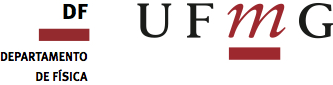

## <p style="text-align: center; font-family:Charter; font-size:1.3em;">Trabalho Final - Introdução à Computação na Física</p>
<p style="text-align: center; font-family:Charter; font-size:1.7em;">Comparação do RMSE (raíz do erro quadrático médio) para diferentes métodos de "fits" na computação: uma aplicação Cosmológica </p>

<p style="text-align: center; font-family:Charter; font-size:1.3em;"> <u>Aluno</u>: Lucas Rocha Castro; <u>Professor:</u>  Von Braun Nascimento</p>

___

#### <p style="text-align: center; font-family:Charter; font-size:1.8em;">Introdução</p>

<p style="font-family:Charter; font-size:1.3em;">Em 1929, o astrônomo Edwin Hubble descobriu uma relação linear entre a velocidade de recessão (afastamento) de galáxias e suas respectivas distâncias até a Terra. Essa reta que se ajusta aos dados de $V$x$d$ possui um coeficiente angular especifico, ao qual foi dado o nome de Constante de Hubble ($H_0$). Essa constante é fundamental para os estudos de Cosmologia, uma vez que calcula a taxa de expansão do universo em um dado instante de referência $t_0$. As equações de Friedmann, que são a base para o modelo cosmológico do nosso universo, são dependentes de $H_0$, por exemplo. Por esse motivo, realizar uma bom estudo quanto à reta que ajusta as observações é de grande importância para essa área da Física. </p>


<div style="display: flex; flex-direction: column; align-items: center;">
    <figure style="margin: 20px;">
        <figcaption style="text-align: center; font-family:Charter; font-size:1.2em">Gráfico original feito por Hubble em 1929 $^{[1]}$</figcaption>
        <img src="https://www.e-education.psu.edu/astro801/sites/www.e-education.psu.edu.astro801/files/image/hubbleslaw_plot.jpg" alt="Image 1" width="400px" />
    </figure>
    <figure style="margin: 20px;">
         <figcaption style="text-align: center; font-family:Charter; font-size:1.2em;">Manipulação das Equações de Friedmann $^{[4]}$(perceba o $H_0$)</figcaption>
        <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/04ac295f458a52350717883d08eec15b8b05ffd5" alt="Image 2" width="350px" />
    </figure>
</div>

<p style="font-family:Charter; font-size:1.3em;"> Neste trabalho, foram utilizados dados reais fornecidos por Freedman et. al $^{[2]}$ de supernovas tipo Ia. Com os dados das velocidades e distâncias desses objetos, pôde-se construir um gráfico cujo ajuste por Mínimos Quadrados forneceu a inclinação ($H_0$) que corresponde a $67,8$ km/s/Mpc. O valor estimado foi muito próximo daquele informado pela literatura, que é de $68$km/s/Mpc, confirmando a acurácia do método dos mínimos quadrados para esse trabalho. O que acontece, no entanto, quando utiliza-se outros métodos para fazer o fit desses mesmos dados? É o que será estudado a seguir a partir da métrica do RMSE (Raíz do Erro Quadrático Médio), uma medida que calcula a diferença quadrática média dos pontos desconhecidos à reta ajustada e tira a raíz para simplificar a interpretação dimensional. </p>
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

from random import sample
from IPython.display import display, HTML
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

In [2]:
#Ajustando os parâmetros dos plots
plt.rcParams['font.family'] = 'Times New Roman'
display(HTML(""" <style>.output_png {display: flex; justify-content: center;}</style>"""))

#### <p style="text-align: center; font-family:Charter; font-size:1.8em;">Dados</p>


[Baixar os dados](https://raw.githubusercontent.com/lrochacastro/Projeto-Final-Introducao-a-Computacao-em-Fisica/refs/heads/main/data.txt "Clique para baixar os dados")

<p style="font-family:Charter; font-size:1.3em;"> Começaremos importando os dados com o uso da biblioteca Pandas e, em seguida, fazendo a regressão linear contendo todos os dados para encontrar a constante de Hubble correspondente.  </p>

In [3]:
#Importando os dados das supernovas a serem plotados
dados = pd.read_csv("C:\\Users\\Humberto\\Downloads\\data.txt", header=None, delim_whitespace=True)

X = np.array(dados[1])
Y = np.array(dados[0])
sorted_indices = np.argsort(X)
x, y = X[sorted_indices], Y[sorted_indices]

Inclinação, intercepto: 67.82251570418597, 529.5775220147144


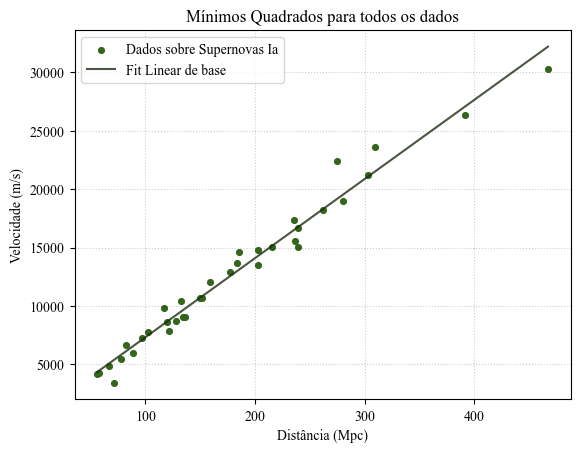

In [4]:
#Plotando todos os dados 
plt.scatter(x, y, marker='o', s=17,  color='#33651b', linewidth=1, label='Dados sobre Supernovas Ia')
plt.grid(alpha=0.2, color='black', linestyle=':')
plt.title("Mínimos Quadrados para todos os dados")
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Distância (Mpc)')

#Fazendo a regressão linear para o conjunto com todos os pontos
def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y)
slope, intercept = params
y_fit = linear_model(x, slope, intercept);

plt.plot(x, y_fit, '#1b2d13', linestyle='-', lw=1.5, alpha=0.8, label='Fit Linear de base')
plt.legend(loc='best');
print(f"Inclinação, intercepto: {slope}, {intercept}")

#### <p style="text-align: center; font-family:Charter; font-size:1.8em;">Metodologia</p>

<p style="font-family:Charter; font-size:1.3em;"> A fim de comparar diferentes tipos de ajustes de curva em Python, foram escolhidos 4 métodos: Mínimos Quadrados, Cubic Spline, Interpolação Linear e Método Gradiente. Aqui, os dados foram separados em duas categorias: dados de treino ($d_{tr}$), que correspondem a um sample aleatório de $70\%$ dos dados originais, e dados de teste ($d_{te}$), correspondentes aos demais $30\%$. </p>

<div style="display: flex; align-items: center;">
  <div>
      <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*A71zTD6_QqUzLhMKj1Rgiw.png" style="width: 3000px; margin-right: 20px;">
      <p style="text-align: center; font-style: italic; font-size: 12px; margin-top: 5px;">Exemplo de erro de alguns pontos com relação ao ajuste. $^{[5]}$</p>
  </div>
  <p style="font-family:Charter; font-size:1.3em;"> Os $d_{tr}$ foram utilizados para fazer cada um dos 4 ajustes diferentes. O objetivo aqui é justamente dar menos pontos para medir o quão bem esses métodos extrapolam os $d_{te}$. Para fazer essa medição quantitativa, utilizaremos o RMSE (Root Mean Square Error), que mede, entre todos os dados, o erro médio (e em seguida tira a raíz), sendo esse erro médio a distância média entre os dados de teste e a reta estimada para cada método. Aquele que tiver menor RMSE indica que melhor ajustou-se a dados nunca antes vistos. Ademais, será computado o tempo de execução de cada um dos 4 tipos de ajustes para avaliar qual teve maior custo computacional. </p>
</div>

<p style="font-family:Charter; font-size:1.3em;"> Aqui serão separados os samples de treino e de teste, definindo valores de x e y de treino e teste em arrays para utilizá-los futuramente em gráficos e no eventual cálculo do RMSE. </p>

In [5]:
#Fazendo o split em dois samples, um de treino e outro de teste
indices = dados.index
indices_treino, indices_teste = train_test_split(indices, test_size=0.3, random_state=130)
 
dados_treino = dados.loc[indices_treino]
dados_teste = dados.loc[indices_teste]

In [6]:
#Definindo os dados de treino:
X_t = np.array(dados_treino[1])
Y_t = np.array(dados_treino[0])
sorted_indices = np.argsort(X_t)
x_t, y_t = X_t[sorted_indices], Y_t[sorted_indices]

In [7]:
#Definindo os dados de teste:
X_teste = np.array(dados_teste[1])
Y_teste = np.array(dados_teste[0])
sorted_indices = np.argsort(X_teste)
x_teste, y_teste = X_teste[sorted_indices], Y_teste[sorted_indices]

<p style="font-family:Charter; font-size:1.3em;"> Definir funções que podem ser chamadas para algumas atividades específicas repetidas ao longo do processo torna o código mais eficaz. Por esse motivo, define-se as funções abaixo com os seguintes objetivos, respectivamente: plotar automaticamente o gráfico contendo os dados de treino e de teste, sem ajuste nenhum, assim como formatações dos eixos e da grade de fundo; finalizar a contagem do tempo de execução da célula (o comando para iniciar o a contagem é adicionada na hora); definir como deve ser feito o cálculo do RMSE para qualquer ajuste (o argumento y_base será mudado a cada método). Em cada célula de cada método, também será criada uma função correspondente para cada ajuste.</p>

In [8]:
def grafico():
    plt.scatter(x_t, y_t,  marker='o', s=17, color='#525252', edgecolor='#161616', linewidth=1, label='Dados de treino')
    plt.scatter(x_teste, y_teste, marker='x', s=40, color='#e50505', linewidth=1.3, label='Dados de teste')
    plt.grid(alpha=0.2, color='black', linestyle=':')
    plt.ylabel('Velocidade (km/s)')
    plt.xlabel('Distância (Mpc)')
    plt.ylim(2082.55, 31594.45)
    plt.xlim(35.45, 487.5)

def Tempo():
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    print(f"Tempo de execução: {execution_time:.9f} segundos")

def calculate_rmse(y_teste, y_base):
    y_teste = np.array(y_teste)
    y_base = np.array(y_base)
    
    mse = np.mean((y_teste - y_base) ** 2)
    rmse = np.sqrt(mse) 
    return rmse

<p style="font-family:Charter; font-size:1.3em;"> A partir de agora, serão feitos os ajustes para cada método e será calculado o RMSE associado. Ao fim será feita uma análise dos resultados obtidos. </p>

<p style="text-align: center; font-family:Charter; font-size:1.6em;"><u>Dados de teste vs ajuste Mínimos Quadrados de Treino</u></p>


Inclinação: 67.93820873524346 Intercepto: 519.6257959821415
Tempo de execução: 0.036155400 segundos


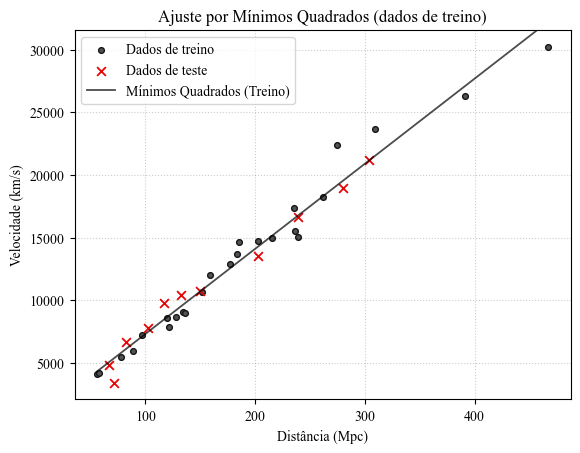

In [9]:
start_time = time.perf_counter() #Inicia a contagem do tempo 

def MinimosQuadrados():
    params, covariance = curve_fit(linear_model, x_t, y_t)
    slope_treino, intercept_treino = params
    y_fit = linear_model(x_t, slope_treino, intercept_treino)
    plt.plot(x_t, y_fit, 'black', linestyle='-', lw=1.3, alpha=0.7, label='Mínimos Quadrados (Treino)')
    print(f"Inclinação: {slope_treino}", f"Intercepto: {intercept_treino}")
    
    return slope_treino, intercept_treino
    
grafico()
slope_treino, intercept_treino = MinimosQuadrados()
plt.title("Ajuste por Mínimos Quadrados (dados de treino)")

plt.legend(loc='best');

Tempo() #Termina a contagem do tempo e printa o resultado

<p style="font-family:Charter; font-size:1.3em;">Para calcular o RMSE, deve-se primeiro obter, para cada $x_{teste}$, um $y_{base}$, para saber, para os pontos que fit desconhecia, quais seriam os pares ordenados esperados para o ajuste que estamos nos baseando. Assim, colocaremos os valores de $x_{teste}$ na equação da reta para cada um dos ajustes, e depois calcularemos o RMSE com essa informação. </p>

<p style="font-family:Charter; font-size:1.3em;">Segundo o fit feito no gráfico de Mínimos Quadrados (de treino), os coeficientes encontrados foram:</p></br>
$ a = 67.93820873524346  $; 
$ b = 519.6257959821415 $
<p style="font-family:Charter; font-size:1.3em;">E, portanto, a equação da reta será:</p></br>
$ y = 67.93820873524346  x + 519.6257959821415 $ </br>


In [10]:
#Achando os valores de y na reta (para cada x_teste) para fazer a subtração com os y_teste e encontrar o RMSE
y_base_base = []

for i in range(len(x_teste)):
    y_bb = slope_treino * x_teste[i] + intercept_treino
    y_base_base.append(y_bb) 
    
print(y_base_base)

[5057.898139496405, 5397.589183172622, 6117.734195766203, 7456.116907850499, 8475.190038879151, 9535.026095148949, 10703.563285395137, 14277.113064868943, 16750.063862831805, 19549.118062723835, 21132.078326255007]


In [11]:
rmse_mq = calculate_rmse(y_teste, y_base_base)
print(f"O RMSE relacionado ao método dos mínimos quadrados é {rmse_mq}")

O RMSE relacionado ao método dos mínimos quadrados é 843.1249473584128


<p style="text-align: center; font-family:Times New Roman; font-size:1.6em;"><u>Dados de teste vs ajuste Cubic Spline</u></p>

Tempo de execução: 0.066567100 segundos


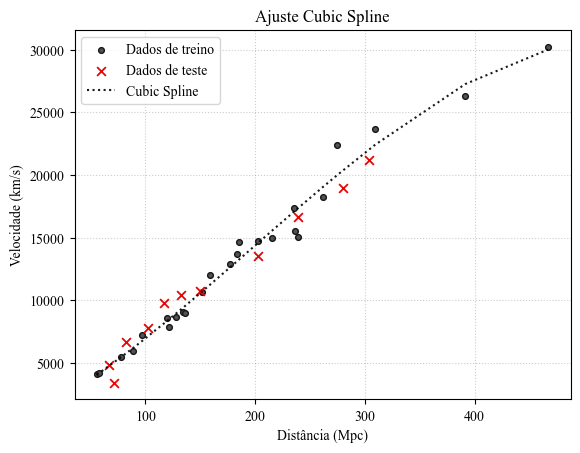

In [12]:
start_time = time.perf_counter()

def CubicSpline():
    spl = UnivariateSpline(x_t, y_t)
    spl.set_smoothing_factor(1e40)
    plt.plot(x_t, spl(x_t), color='black', linestyle=':', lw=1.5, alpha=0.9, label='Cubic Spline')

grafico()
CubicSpline()
plt.title("Ajuste Cubic Spline")
plt.legend(loc='best');

Tempo()

<p style="font-family:Charter; font-size:1.3em;">Para o ajuste Cubic Spline, não usaremos uma equação fechada para a reta, mas podemos extrapolar os dados para os valores de $x_{teste}$ que o ajuste não conhecia. </p></br>

In [13]:
spl = UnivariateSpline(x_t, y_t)
spl.set_smoothing_factor(1e40)

y_base_cs = spl(x_teste)  

In [14]:
#Cálculo do RMSE
rmse_cs = calculate_rmse(y_teste, y_base_cs)
print(f"O RMSE relacionado ao método do Cubic Spline é {rmse_cs}")

O RMSE relacionado ao método do Cubic Spline é 1050.095602528626


<p style="text-align: center; font-family:Times New Roman; font-size:1.6em;"><u>Dados de teste vs ajuste de Interpolação Linear</u></p>

Tempo de execução: 0.085002300 segundos


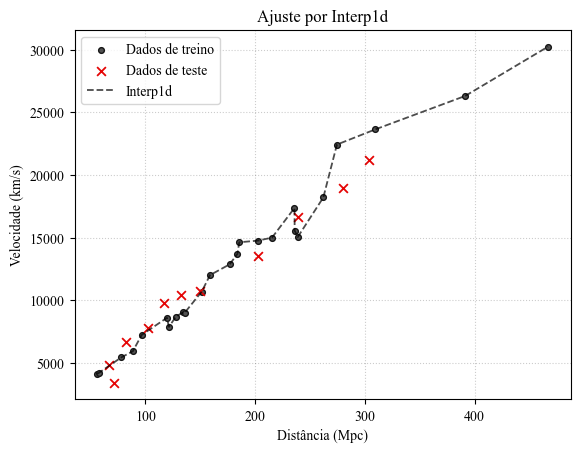

In [15]:
#Método do interpolate
start_time = time.perf_counter()

def Interpolate():
    linear_interp = interp1d(x_t, y_t, kind='linear')
    y_interp = linear_interp(x_t)
    plt.plot(x_t, y_interp, 'black', alpha=0.7, linestyle='--', lw = 1.3, label='Interp1d')

grafico()
Interpolate()
plt.title('Ajuste por Interp1d')
plt.legend(loc='best');

Tempo()

<p style="font-family:Charter; font-size:1.3em;">Assim como no Cubic Spline, aqui não temos uma equação fechada para obter os valores de y correspondentes ao Interp1d, mas pode-se obtê-los da seguinte maneira: </p>

In [16]:
linear_interp = interp1d(x_t, y_t, kind='linear')

y_base_il = linear_interp(x_teste)  

In [17]:
#Cálculo do RMSE
rmse_il = calculate_rmse(y_teste, y_base_il)
print(f"O RMSE relacionado ao método da interpolação linear é {rmse_il}")

O RMSE relacionado ao método da interpolação linear é 1659.9666010562923


<p style="text-align: center; font-family:Times New Roman; font-size:1.6em;"><u>Dados de teste vs ajuste por Gradiente</u></p>

Inclinação: 70.10700817372508
Intercepto: 0.5145087056298734
Tempo de execução: 0.101250000 segundos


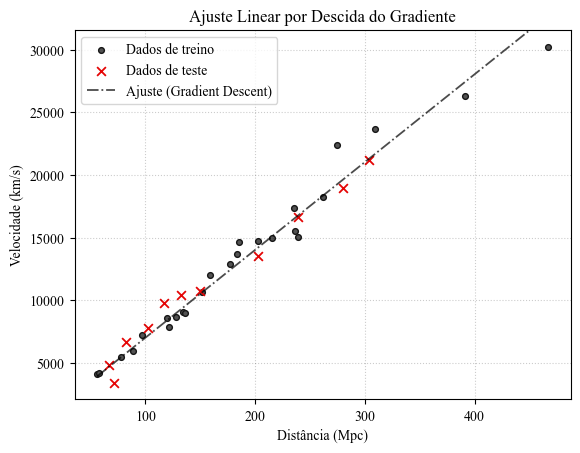

In [18]:
#Método dos gradientes
start_time = time.perf_counter()

def gradient_descent_fit(x, y, learning_rate=1e-6, epochs=1000):
    m, b = 0.0, 0.0
    n = len(x)
    for _ in range(epochs):
        y_pred = m * x + b
        dm = (-2 / n) * np.sum(x * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)
        m -= learning_rate * dm
        b -= learning_rate * db
    return m, b

slope, intercept = gradient_descent_fit(x_t, y_t)
y_grad = slope * x_t + intercept
print("Inclinação:", slope)
print("Intercepto:", intercept)

grafico()
plt.plot(x_t, y_grad, color='black', linestyle='-.', linewidth=1.3, alpha=0.7, label='Ajuste (Gradient Descent)')
plt.title("Ajuste Linear por Descida do Gradiente")
plt.legend(loc='best');

Tempo()

<p style="font-family:Charter; font-size:1.3em;">Esse ajuste também foi ótimo, apesar de um pouco diferente do método dos Mínimos Quadrados. Calcularemos o RMSE a fim de comparar se ele se sairá melhor do que o MQ na extrapolação.</p>

In [19]:
y_base_gr = []

for i in range(len(x_teste)):
    y_b = slope * x_teste[i] + intercept
    y_base_gr.append(y_b) 

In [20]:
#Cálculo do RMSE
rmse_gr = calculate_rmse(y_teste, y_base_gr)
print(f"O RMSE relacionado ao método do gradiente é {rmse_gr}")

O RMSE relacionado ao método do gradiente é 881.6121250214834


<p style="font-family:Charter; font-size:1.3em;">Plotando todos os gráficos simultaneamente para fins de comparação:</p>

Inclinação: 67.93820873524346 Intercepto: 519.6257959821415


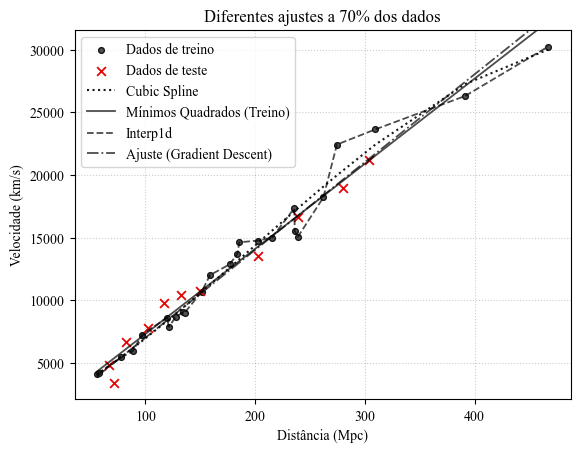

In [21]:
grafico()
CubicSpline()
MinimosQuadrados()
Interpolate()

plt.plot(x_t, y_grad, color='black', linestyle='-.', linewidth=1.3, alpha=0.7, label='Ajuste (Gradient Descent)')
plt.title('Diferentes ajustes a 70% dos dados')
plt.legend(loc='best');

#### <p style="text-align: center; font-family:Charter; font-size:1.8em;">Conclusão</p>
<p style="font-family:Charter; font-size:1.3em;">Como o cálculo do RMSE se baseia na distância quadrática do fit aos pontos, era esperado que o método dos Mínimos Quadrados se saísse excepcionalmente bem em reduzir esse valor. Foi o que foi observado: o primeiro ajuste foi o de menor RMSE em comparação com os demais. O segundo lugar fica para o ajuste por gradientes, que foi muito bem calibrado. No entanto, tanto o tempo de execução foi maior do que a dos mínimos quadrados. Por esse motivo, esse tipo se mostra menos eficiente na tarefa de ajustar dados lineares. Na terceira posição está o Cubic Spline suavizado, uma vez que seguiu bem o "rastro dos pontos" em uma parcela dos dados, se perdendo da reta no final. Ou seja, foi um interpolador não muito brusco quando suavizado o suficiente. O resultado era esperado, uma vez que o Spline é mais utilizado para dados não-lineares e também não é bom extrapolador. E, por fim, em última colocação, tem-se o ajuste por interpolação linear. A interpolação direta entre cada ponto foi uma terrível opção para ajustar os dados devido ao ruído, como pôde ser visto pela alta medida de RMSE, a maior de todas.</p>
<p style="font-family:Charter; font-size:1.3em;">Logo, se o objetivo é ser capaz de prever dados novos utilizando dados já conhecidos ajustados e seguindo uma relação linear, o método do ajuste por mínimos quadrados é o mais eficiente computacionalmente e matematicamente. </p></br>

### <p style="font-family:Times New Roman; font-size:1.3em;">Agradecimentos</p>

<p style="font-family:Times New Roman; font-size:1.3em;"> Agradeço a duas pessoas que foram essenciais para esse trabalho: Profa. Sílvia Helena, do Depto. de Física da UFMG, e Letícia Nunes, minha namorada. À Profa. Sílvia por me ajudar a encontrar um dataset que pudesse ser utilizado para aquilo que eu planejava, uma vez que ela me recomendou olhar as tabelas contidas nos artigos da Wendy Freedman. À minha namorada Letícia por ter dado a ideia principal sobre o cálculo do RSME e ter pacientemente me ajudado a escrever partes do código que saíam do meu escopo de conhecimento, como, por exemplo, o uso da biblioteca Pandas, a separação dos samples de treino e teste e a formatação do corpo desse Jupyter Notebook.</p>

### <p style="font-family:Times New Roman; font-size:1.3em;">Referências</p>


**[1]** Hubble E. A RELATION BETWEEN DISTANCE AND RADIAL VELOCITY AMONG EXTRA-GALACTIC NEBULAE. Proc Natl Acad Sci U S A. 1929 Mar 15;15(3):168-73. doi: 10.1073/pnas.15.3.168. PMID: 16577160; PMCID: PMC522427. </br>
</br>
**[2]** FREEDMAN, W. L.; MADORE, B. F.; GIBSON, B. K.; FERRARESE, L.; KELSON, D.; SAKAI, S.; ... & KENNICUTT, R. C. Jr. Final results from the Hubble Space Telescope Key Project to measure the Hubble constant. *The Astrophysical Journal*, v. 553, n. 1, p. 47–72, 2001. DOI: https://doi.org/10.1086/320638. </br>
</br>
**[3]** UNIVERSITY OF CHICAGO. Hubble constant explained. 2020. Disponível em: https://news.uchicago.edu/explainer/hubble-constant-explained. Acesso em: 2 dez. 2024. </br>
</br>
**[4]** Friedmann equations. Disponível em: https://en.wikipedia.org/wiki/Friedmann_equations. Acesso em: 3 dez. 2024.

**[5]** SINDAL, Shubham. Machine Learning: Linear Regression. Medium, 20 ago. 2020. Disponível em: https://shubhamsindal0098.medium.com/machine-learning-linear-regression-7b2e04454368. Acesso em: 3 dez. 2024.